In [1]:
import numpy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('D:\\dataset\\predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
df.shape

(10000, 10)

In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
#df['Target'].value_counts()
import pandas as pd

df = pd.read_csv(r'D:\dataset\predictive_maintenance.csv')
print(df['Target'].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


In [9]:
import seaborn as sns
# sns.countplot(df['Target'],label="count")

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df['Failure Type'] = le.fit_transform(df['Failure Type'])
df['Target'] = le.fit_transform(df['Target'])

In [12]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1


<Axes: ylabel='count'>

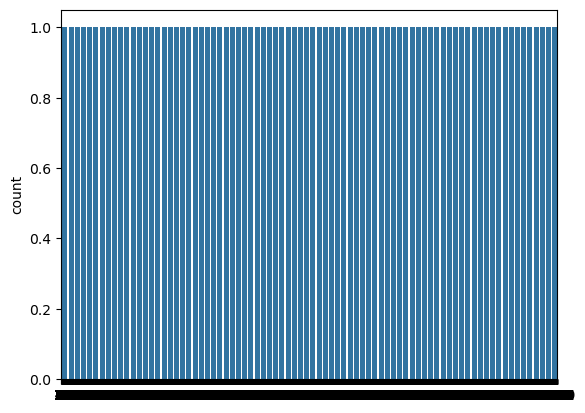

In [13]:
sns.countplot(df['Target'], label="count")

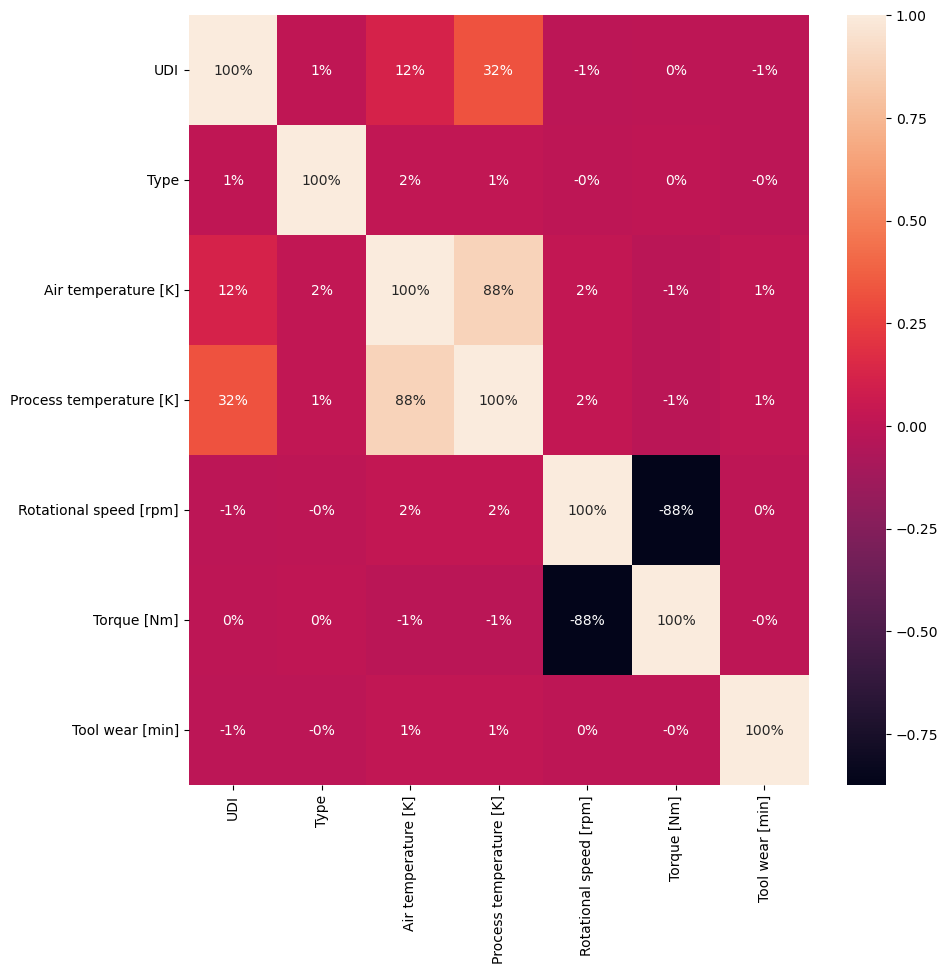

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include='number').iloc[:, 0:7].corr(), annot=True, fmt=".0%")
plt.savefig('my_graph.png', dpi=300, bbox_inches='tight')


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


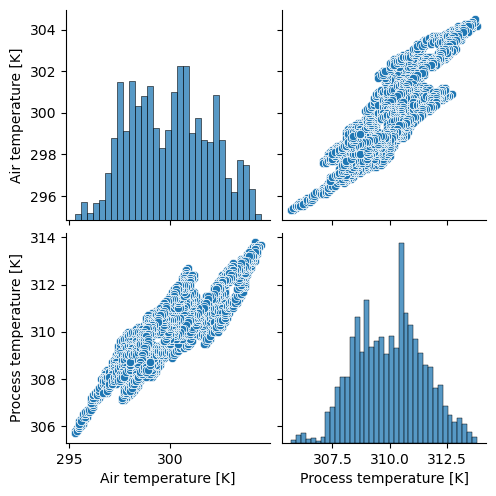

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_csv('D:\\dataset\\predictive_maintenance.csv')  # Use the correct path

# Optional: Check the column names to find the correct "target" column
print(df.columns)

# Step 2: Plot pairplot (update "Target" to match your actual target column name)
sns.pairplot(df.iloc[:, 1:5], )  # Change "Target" if needed
plt.show()
plt.savefig('pair_graph.png', dpi=300, bbox_inches='tight')


In [19]:
print(df.shape)      # shows (num_rows, num_columns)
print(df.columns)    # lists column names


(10000, 10)
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [21]:
X = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]
Y = df['Target']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=54)

In [23]:
fromr sklean.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [24]:
# 2️⃣ Make predictions
y_pred = model.predict(X_test)

In [25]:
# 3️⃣ Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.981

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1940
           1       0.84      0.45      0.59        60

    accuracy                           0.98      2000
   macro avg       0.91      0.72      0.79      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix:
 [[1935    5]
 [  33   27]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)


In [27]:
# 3️⃣ Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))

Accuracy: 0.998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1940
           1       1.00      0.93      0.97        60

    accuracy                           1.00      2000
   macro avg       1.00      0.97      0.98      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[1940    0]
 [   4   56]]


In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)


In [29]:
# 3️⃣ Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1940
           1       0.00      0.00      0.00        60

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.96      2000


Confusion Matrix:
 [[1940    0]
 [  60    0]]


C:\ProgramData\anaconda3\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)


In [31]:
# 3️⃣ Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_knn))

Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1940
           1       0.69      0.30      0.42        60

    accuracy                           0.97      2000
   macro avg       0.84      0.65      0.70      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix:
 [[1932    8]
 [  42   18]]


In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred_nb = nb.predict(X_test)


In [33]:
# 3️⃣ Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb))

Accuracy: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1940
           1       0.72      0.95      0.82        60

    accuracy                           0.99      2000
   macro avg       0.86      0.97      0.91      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
 [[1918   22]
 [   3   57]]


In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [35]:
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = RandomForestClassifier(random_state=42)


In [36]:
# Combine using hard voting
ensemble = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('rf', model3)
], voting='hard')  # Use voting='soft' if models support predict_proba()


In [37]:
# Fit ensemble model
ensemble.fit(X_train, Y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [38]:
# Predict
y_pred_ensemble = ensemble.predict(X_test)


In [39]:
# Evaluate
print("Ensemble Accuracy:", accuracy_score(Y_test, y_pred_ensemble))


Ensemble Accuracy: 0.998


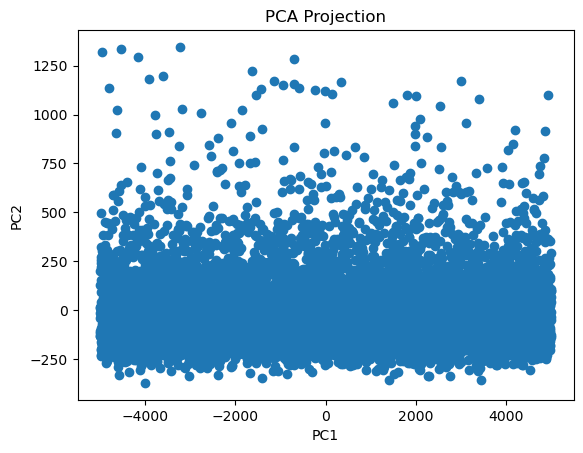

In [40]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [42]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [43]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada.fit(X_train, Y_train)
y_pred_ada = ada.predict(X_test)


C:\ProgramData\anaconda3\jupyter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [44]:
# 3️⃣ Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_ada))

Accuracy: 0.9985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1940
           1       1.00      0.95      0.97        60

    accuracy                           1.00      2000
   macro avg       1.00      0.97      0.99      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[1940    0]
 [   3   57]]


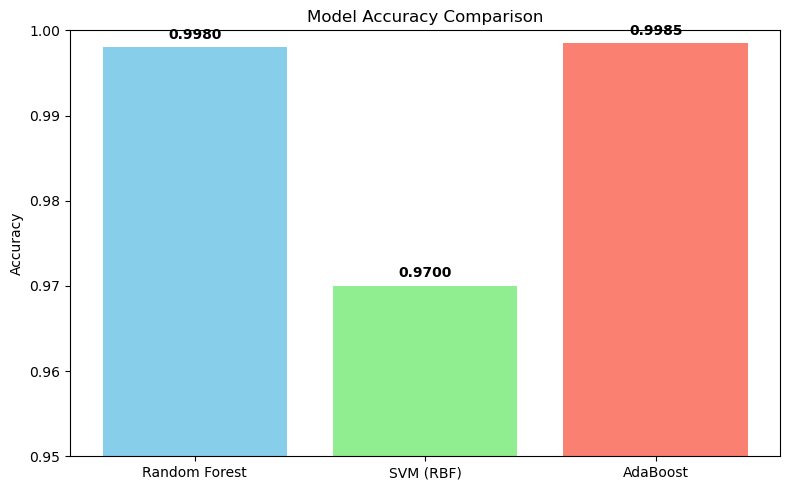

In [1]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Random Forest', 'SVM (RBF)', 'AdaBoost']
accuracies = [0.998, 0.97, 0.9985]
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)  # Focus on high accuracy range

# Annotate bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
